In [1]:
import os
from os.path import join
import sys
import time
from tqdm import tqdm
REPO = join(os.getenv("REPO"), "ukbb_gwas/bin")
sys.path.insert(0, REPO)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

from dataloader import VariantLoader, EmbeddingLoader, ExomeLoader

### Load Database

In [3]:
DATA_DIR = '/orange/sai.zhang/khoa/data/UKBB'#os.getenv("PROCESSED_DATA")
REF_DIR = os.getenv("PROCESSED_DATA")
VARIANT_DB = join(DATA_DIR, "processed/sqlite/ukbb_sample_indexed.db")
EMBEDDING_DB = join(DATA_DIR, "processed/embeddings/protein_embeddings.h5")
REF_DB = join(REF_DIR, "processed/ref_exome.csv")

In [4]:
variantLoader = VariantLoader(VARIANT_DB)
meanEmbeddingLoader = EmbeddingLoader(EMBEDDING_DB, metric = "mean")
# maxEmbeddingLoader = EmbeddingLoader(EMBEDDING_DB, metric = "max")
# meanEmbeddingLoader = EmbeddingLoader(EMBEDDING_DB, metric = "mean_middle_layer_12")
# maxEmbeddingLoader = EmbeddingLoader(EMBEDDING_DB, metric = "max_middle_layer_12")

Loading embeddings: 100%|██████████| 24/24 [01:01<00:00,  2.56s/it]


### Obtain sample matrix

In [5]:
meanExomeLoader = ExomeLoader(variantLoader, meanEmbeddingLoader, REF_DB)
# maxExomeLoader = ExomeLoader(variantLoader, maxEmbeddingLoader, REF_DB)
# get matrices of first 5 samples
all_samples = variantLoader.get_all_samples()
print("Mean Embeddings Matrix")
mean_data = meanExomeLoader.get_sample_matrix(all_samples[:5])
print("Max Embeddings Matrix")
# max_data = maxExomeLoader.get_sample_matrix(all_samples[:5])

Mean Embeddings Matrix
Querying database for sample variants...
Query completed. Found 5 samples with variants.
Sample matrix constructed for 5 samples: [1000015, 1000027, 1000046, 1000050, 1000063]
Max Embeddings Matrix


### Obtain Reference matrix

In [6]:
# get ref embeddings
mean_ref = meanExomeLoader.get_ref_embeddings()
# max_ref = maxExomeLoader.get_ref_embeddings()
# mean_middle_ref = meanExomeLoader.get_ref_embeddings()

### Visualize embeddings and embeddings difference from reference embeddings

In [8]:
def visualize_exome_embeddings(data, title, ax=None):
    x = np.arange(data.shape[1])
    y = np.arange(data.shape[0])
    x, y = np.meshgrid(x, y)

    if ax is None:
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
    # norm = Normalize(vmin=data.min(), vmax=data.max())
    # surf = ax.plot_surface(x, y, data, cmap='coolwarm', norm=norm, edgecolor='none')
    surf = ax.plot_surface(x, y, data, cmap='coolwarm', edgecolor='none')
    ax.set_title(title, pad=20)
    ax.set_xlabel("Embedding Index", labelpad=10)
    ax.set_ylabel("Transcript Index", labelpad=10)
    ax.set_zlabel("Value", labelpad=10)
    ax.set_zlim(data.min(), data.max())
    
    if not hasattr(ax, "_subplotspec"):  # Means it's a standalone figure
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)
    return surf



In [9]:
from matplotlib.colors import Normalize


In [10]:
def visualize_exome_embeddings_batch(data, ref, sample_ids, flag):
    data_list = []
    titles = []
    for sample_id in sample_ids:
        data_list.append(data[sample_id])
        data_list.append(data[sample_id] - ref)

        titles.append(f"{flag} exome embedding for sample {sample_id}")
        titles.append(f"Embedding difference from Reference for sample {sample_id}")

    fig = plt.figure(figsize=(16, 12))
    for i, (d, title) in enumerate(zip(data_list, titles), 1):
        ax = fig.add_subplot(2, 2, i, projection='3d')
        surf = visualize_exome_embeddings(d, title, ax=ax)
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)
    plt.subplots_adjust(hspace=0.4)
    plt.show()

In [33]:
meanExomeLoader.reference_db[meanExomeLoader.reference_db.transcript == "NM_000027"]

,chr,transcript,Protein,ID
7579,chr4,NM_000027,MARKSNLPVLLVPFLLCQALVRCSSPLPLVVNTWPFKNATEAAWRA...,ref_7579


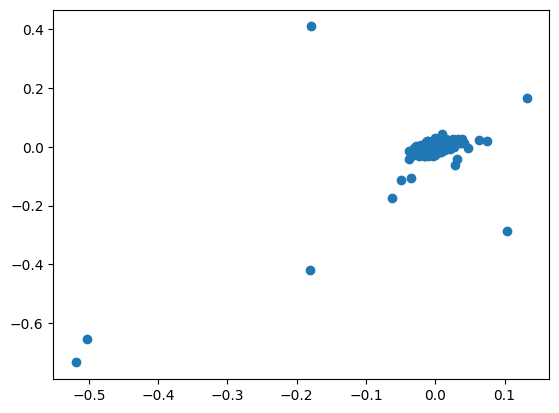

In [34]:
plt.scatter(meanEmbeddingLoader.get_ref_embeddings()[7579], meanEmbeddingLoader.get_embeddings("chr4", 14046))

In [85]:
meanEmbeddingLoader.get_embeddings("chr4", 14046) 

array([-0.00628445,  0.00684605, -0.01216407, ..., -0.00195092,
        0.0074068 ,  0.00322472], dtype=float32)

In [ ]:
variantLoader.get_sample_variants(["1000032"])

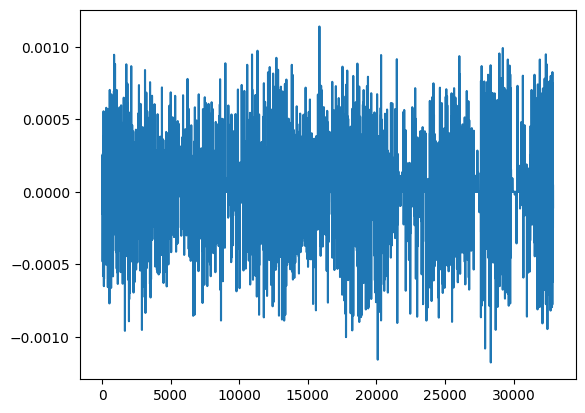

In [58]:
plt.plot((mean_data["1000670"] - error_data["1000670"]).mean(axis = 1))

In [71]:
mean_ref

array([[ 0.01171293,  0.01085288, -0.01740156, ..., -0.00045327,
        -0.0015281 , -0.0051909 ],
       [ 0.0100253 ,  0.00779059, -0.01177914, ..., -0.02020977,
         0.00599495, -0.00234284],
       [ 0.00858907,  0.01364208, -0.008393  , ..., -0.01739979,
         0.00548016, -0.00065205],
       ...,
       [-0.00525991,  0.00538971, -0.00953866, ..., -0.00755417,
         0.0160479 , -0.0088606 ],
       [ 0.00659391,  0.004566  , -0.00945167, ..., -0.00062128,
         0.00060483, -0.00478004],
       [ 0.00591168,  0.00026229, -0.00971089, ..., -0.00071327,
        -0.00174317, -0.00516609]], dtype=float32)

In [72]:
mean_ref

array([[ 0.01171293,  0.01085288, -0.01740156, ..., -0.00045327,
        -0.0015281 , -0.0051909 ],
       [ 0.0100253 ,  0.00779059, -0.01177914, ..., -0.02020977,
         0.00599495, -0.00234284],
       [ 0.00858907,  0.01364208, -0.008393  , ..., -0.01739979,
         0.00548016, -0.00065205],
       ...,
       [-0.00525991,  0.00538971, -0.00953866, ..., -0.00755417,
         0.0160479 , -0.0088606 ],
       [ 0.00659391,  0.004566  , -0.00945167, ..., -0.00062128,
         0.00060483, -0.00478004],
       [ 0.00591168,  0.00026229, -0.00971089, ..., -0.00071327,
        -0.00174317, -0.00516609]], dtype=float32)

In [10]:
mean_data["1000032"]

array([[ 0.01171293,  0.01085288, -0.01740156, ..., -0.00045327,
        -0.0015281 , -0.0051909 ],
       [ 0.0100253 ,  0.00779059, -0.01177914, ..., -0.02020977,
         0.00599495, -0.00234284],
       [ 0.00858907,  0.01364208, -0.008393  , ..., -0.01739979,
         0.00548016, -0.00065205],
       ...,
       [-0.00525991,  0.00538971, -0.00953866, ..., -0.00755417,
         0.0160479 , -0.0088606 ],
       [ 0.00659391,  0.004566  , -0.00945167, ..., -0.00062128,
         0.00060483, -0.00478004],
       [ 0.00591168,  0.00026229, -0.00971089, ..., -0.00071327,
        -0.00174317, -0.00516609]], dtype=float32)

In [11]:
(mean_data["1000032"] - mean_ref).min()

-0.7414065

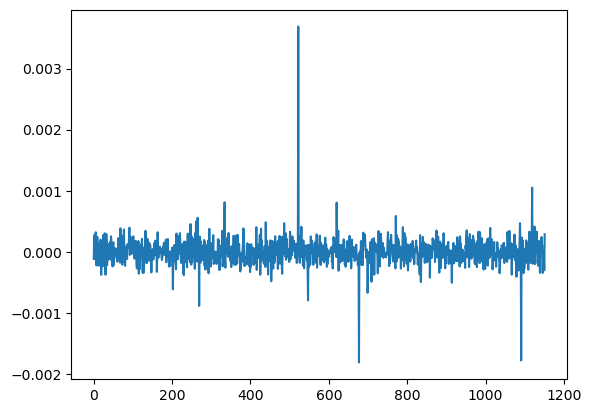

In [14]:
plt.plot((mean_data["1000032"] - mean_ref)[16])

In [90]:
(mean_data["1000032"][:1000] - mean_ref[:1000]).max()

0.090286545

In [15]:
diff = (mean_data["1000032"][:1000] - mean_ref[:1000])

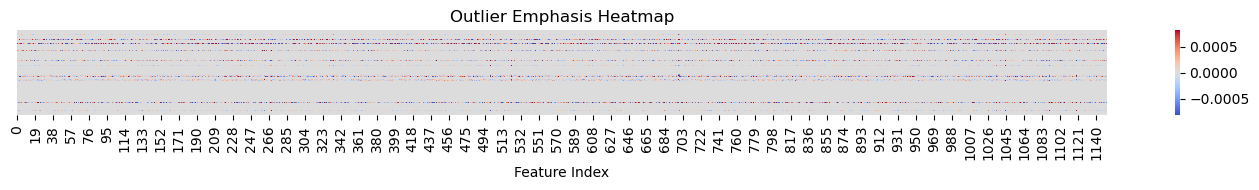

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diff = mean_data["1000032"][:1000] - mean_ref[:1000]

# Mask zeros
masked_diff = np.ma.masked_where(diff == 0, diff)

# Optionally clip extreme values for color scaling
vmax = np.percentile(np.abs(diff), 99)  # top 1% abs value
vmin = -vmax

plt.figure(figsize=(14, 2))
sns.heatmap(masked_diff, cmap="coolwarm", center=0, vmin=vmin, vmax=vmax, cbar=True)
plt.title("Outlier Emphasis Heatmap")
plt.xlabel("Feature Index")
plt.yticks([])
plt.tight_layout()
plt.show()


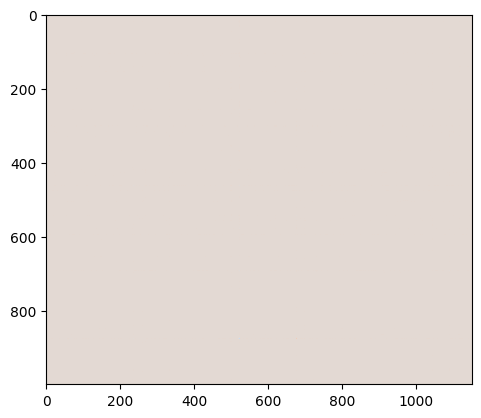

In [92]:
plt.imshow((mean_data["1000032"][:1000] - mean_ref[:1000]), cmap="coolwarm", vmax= 0.09, vmin = -0.1)

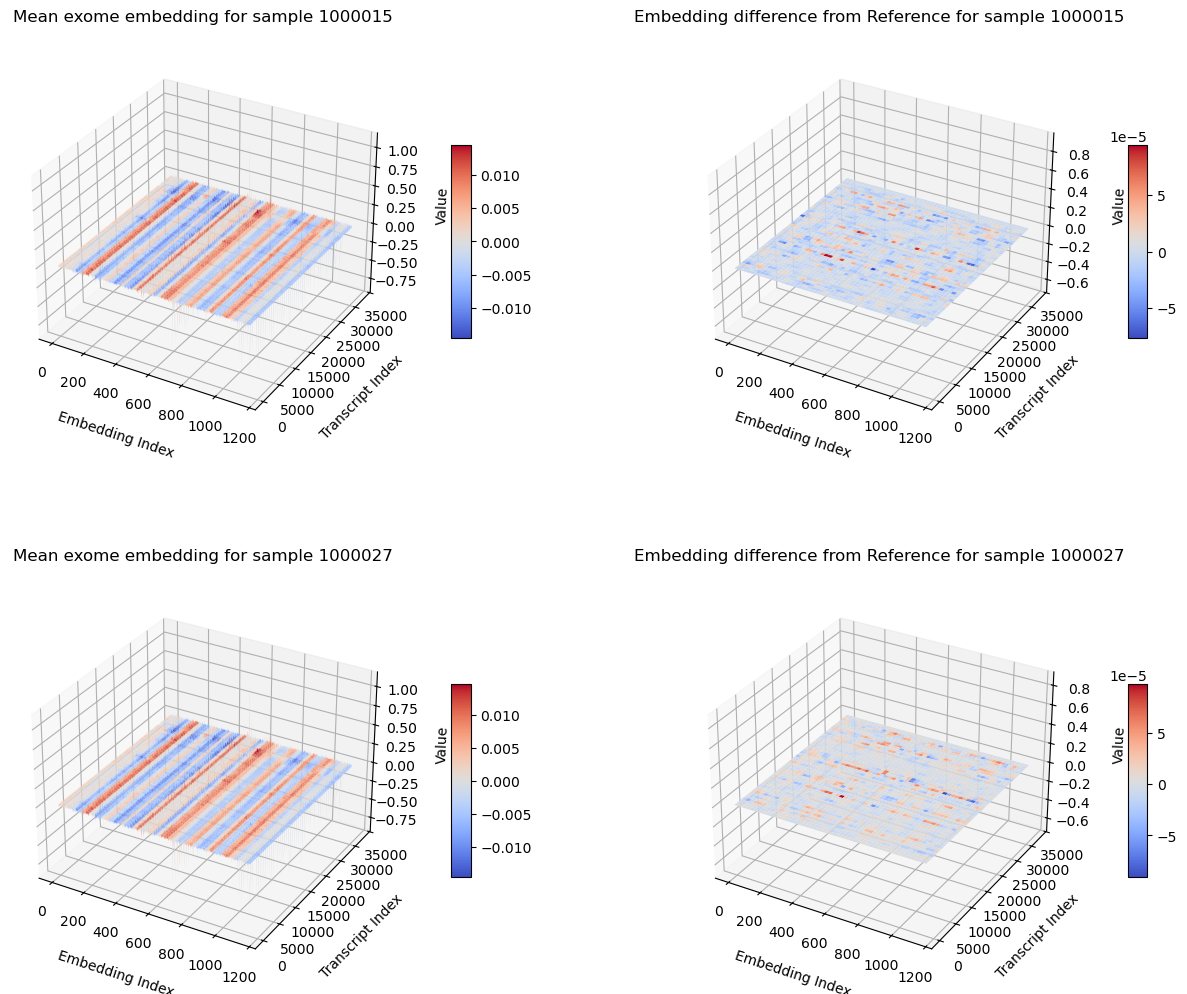

In [11]:
mean_sample_ids = list(mean_data.keys())[:2]
visualize_exome_embeddings_batch(mean_data, mean_ref, mean_sample_ids, "Mean")

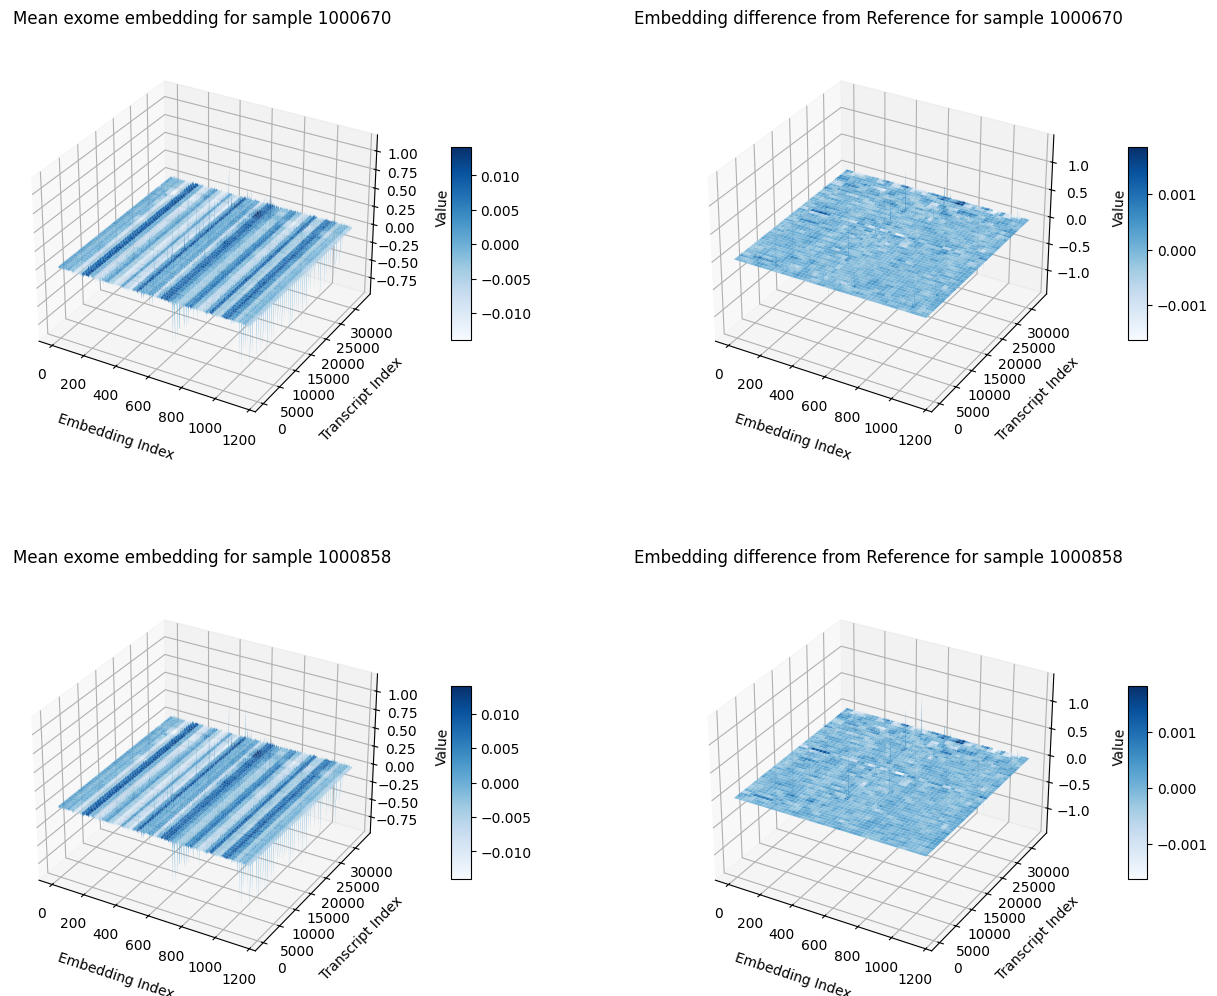

In [35]:
mean_sample_ids = list(mean_data.keys())[:2]
visualize_exome_embeddings_batch(mean_data, mean_ref, mean_sample_ids, "Mean")

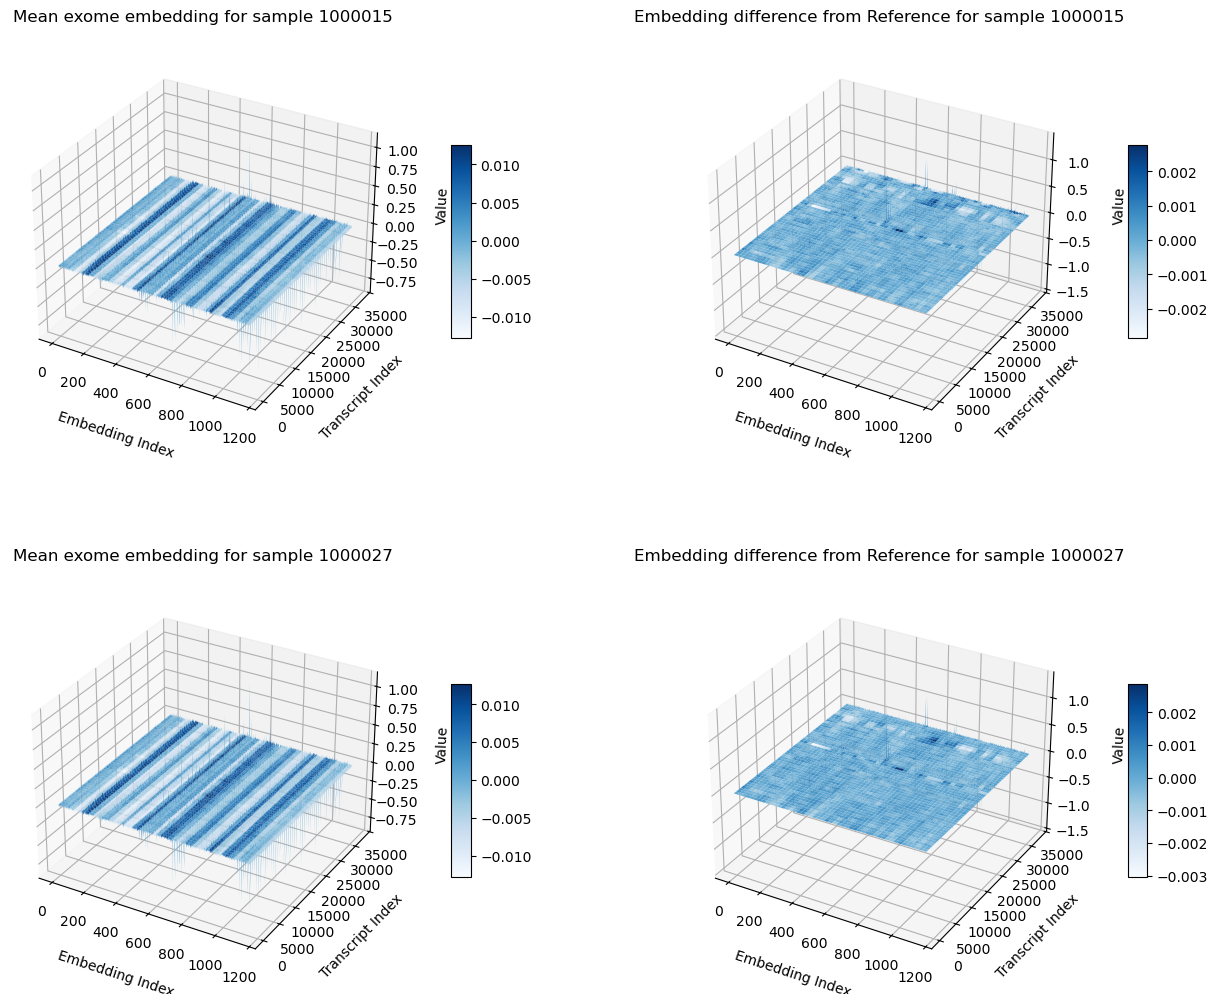

In [39]:
mean_sample_ids = list(mean_data.keys())[:2]
visualize_exome_embeddings_batch(mean_data, mean_ref, mean_sample_ids, "Mean")

In [36]:
np.abs(max_data["1000015"]).mean()

NameError: name 'max_data' is not defined

In [37]:
np.abs(mean_data["1000015"]).mean()

KeyError: '1000015'

In [61]:
np.abs(mean_data["1000015"]).max()

1.1898755

In [54]:
np.abs(max_data["1000015"]).mean()

0.08444842

In [55]:
np.abs(max_data["1000015"]).mean()

0.08444842

In [50]:
np.abs(mean_data["1000015"]).mean()

0.012362475

In [51]:
np.abs(mean_data["1000015"]).max()

1.1878111

In [38]:
max_sample_ids = list(max_data.keys())[:2]
visualize_exome_embeddings_batch(max_data, max_ref, max_sample_ids, "Max")

NameError: name 'max_data' is not defined